In [7]:
import pandas
# We can use the pandas library in Python to read in the CSV file
# This creates a pandas dataframe and assigns it to the titanic variable
titanic = pandas.read_csv("titanic_train.csv")

# Print the first five rows of the dataframe
print(titanic.head(5))
titanic.describe()

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,NaN,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,NaN,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,NaN,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Cleaning Up Missing Data

When you used .describe() on the titanic dataframe on the last screen, you might have noticed that the Age column has a count of 714, while all of the other columns have a count of 891. This indicates that there are missing values in the Age column -- the count only includes non-missing (null, NA, or not a number) values.

This means that the data isn't perfectly clean, so we're going to have to clean it ourselves. We don't want to have to remove the rows with missing values, because more data helps us train a better algorithm. We also don't want to ditch the entire column, because age is probably fairly important to our analysis.

There are many ways to clean up missing data. One of the easiest is to fill in all of the missing values with the median of all the values in the column.

We can select a single column by indexing the dataframe like a dictionary. This gives us a pandas series:


In [8]:
titanic["Age"]=titanic["Age"].fillna(titanic["Age"].median())

In [9]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [10]:
#Converting the Sex Column to Numeric

map_sex = {"Sex":{"male":0,"female":1}}
titanic=titanic.replace(map_sex)
titanic["Sex"].head()

0    0
1    1
2    1
3    1
4    0
Name: Sex, dtype: int64

In [11]:
titanic["Embarked"] = titanic["Embarked"].fillna("S")
map_embarked = {"Embarked":{"S":0,"C":1,"Q":2}}
titanic=titanic.replace(map_embarked)
titanic.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,1
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,0
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,0


inear regression can be a very powerful algorithm, but it does have a few downsides:

    If a column and an outcome aren't related linearly, it won't work well. For example, if older women don't survive as often except for women over 80, linear regression won't pick this up.
    It can't give you survival probabilities -- only absolute values indicating whether or not someone will survive.

We'll talk about how to address both of these issues later on. For now, we'll learn how to calculate linear regression coefficients automatically, as well as how to use multiple columns to predict an outcome.

In [15]:
titanic_test = pandas.read_csv("titanic_test.csv")
titanic_test["Age"] = titanic_test["Age"].fillna(titanic["Age"].median())
titanic_test["Fare"] = titanic_test["Fare"].fillna(titanic_test["Fare"].median())
titanic_test.loc[titanic_test["Sex"] == "male", "Sex"] = 0 
titanic_test.loc[titanic_test["Sex"] == "female", "Sex"] = 1
titanic_test["Embarked"] = titanic_test["Embarked"].fillna("S")

titanic_test.loc[titanic_test["Embarked"] == "S", "Embarked"] = 0
titanic_test.loc[titanic_test["Embarked"] == "C", "Embarked"] = 1
titanic_test.loc[titanic_test["Embarked"] == "Q", "Embarked"] = 2

In [17]:
from sklearn.linear_model import LogisticRegression
# Initialize the algorithm class
alg = LogisticRegression(random_state=1)

# Train the algorithm using all the training data
alg.fit(titanic[predictors], titanic["Survived"])

# Make predictions using the test set
predictions = alg.predict(titanic_test[predictors])

# Create a new dataframe with only the columns Kaggle wants from the data set
submission = pandas.DataFrame({
        "PassengerId": titanic_test["PassengerId"],
        "Survived": predictions
    })

#Running Random forest classifier
 With random forests, we build hundreds of trees with slightly randomized input data, and slightly randomized split points. Each tree in a random forest gets a random subset of the overall training data. The algorithm performs each split point in each tree on a random subset of the potential columns to split on. By averaging the predictions of all of the trees, we get a stronger overall prediction and minimize overfitting.

In [19]:
from sklearn import cross_validation
from sklearn.ensemble import RandomForestClassifier

predictors = ["Pclass", "Sex", "Age", "SibSp", "Parch", "Fare", "Embarked"]

# Initialize our algorithm with the default paramters
# n_estimators is the number of trees we want to make
# min_samples_split is the minimum number of rows we need to make a split
# min_samples_leaf is the minimum number of samples we can have at the place where a tree branch ends (the bottom points of the tree)
alg = RandomForestClassifier(random_state=1, n_estimators=10, min_samples_split=2, min_samples_leaf=1)
# Compute the accuracy score for all of the cross validation folds; this is much simpler than what we did before
kf = cross_validation.KFold(titanic.shape[0], n_folds=3, random_state=1)
scores = cross_validation.cross_val_score(alg, titanic[predictors], titanic["Survived"], cv=kf)

# Take the mean of the scores (because we have one for each fold)
print(scores.mean())

0.785634118967


In [20]:
alg = RandomForestClassifier(random_state=1, n_estimators=50, min_samples_split=4, min_samples_leaf=2)
# Compute the accuracy score for all the cross-validation folds; this is much simpler than what we did before
kf = cross_validation.KFold(titanic.shape[0], 3, random_state=1)
scores = cross_validation.cross_val_score(alg, titanic[predictors], titanic["Survived"], cv=kf)

# Take the mean of the scores (because we have one for each fold)
print(scores.mean())

0.81593714927


In [21]:
# Generating a familysize column
titanic["FamilySize"] = titanic["SibSp"] + titanic["Parch"]

# The .apply method generates a new series
titanic["NameLength"] = titanic["Name"].apply(lambda x: len(x))

Extracting the Passengers' Titles With a Regular Expression

We can extract the passengers' titles from their names. The titles take the form of Master., Mr., Mrs., etc. There are a few very common titles, and a "long tail" of titles that only one or two passengers have.

First we'll extract the titles with a regular expression, and then map each unique title to an integer value.

Then we'll have a numeric column that corresponds to the appropriate Title.

In [22]:
import re

# A function to get the title from a name
def get_title(name):
    # Use a regular expression to search for a title  
    # Titles always consist of capital and lowercase letters, and end with a period
    title_search = re.search(' ([A-Za-z]+)\.', name)
    # If the title exists, extract and return it
    if title_search:
        return title_search.group(1)
    return ""

# Get all of the titles, and print how often each one occurs
titles = titanic["Name"].apply(get_title)
print(pandas.value_counts(titles))

# Map each title to an integer  
# Some titles are very rare, so they're compressed into the same codes as other titles
title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Dr": 5, "Rev": 6, "Major": 7, "Col": 7, "Mlle": 8, "Mme": 8, "Don": 9, "Lady": 10, "Countess": 10, "Jonkheer": 10, "Sir": 9, "Capt": 7, "Ms": 2}
for k,v in title_mapping.items():
    titles[titles == k] = v

# Verify that we converted everything
print(pandas.value_counts(titles))

# Add in the title column
titanic["Title"] = titles

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Col           2
Major         2
Mlle          2
Countess      1
Ms            1
Lady          1
Jonkheer      1
Don           1
Mme           1
Capt          1
Sir           1
Name: Name, dtype: int64
1     517
2     183
3     125
4      40
5       7
6       6
7       5
10      3
8       3
9       2
Name: Name, dtype: int64


Generating a Feature for Family Groups

We can also generate a feature that indicates which family passengers belong to. Because survival was probably very dependent on your family and the people around you, this has a good chance of being a helpful feature.

To create this feature, we'll concatenate each passenger's last name with FamilySize to get a unique family ID. Then we'll be able to assign a code to each person based on their family ID.

In [23]:
import operator

# A dictionary mapping family name to ID
family_id_mapping = {}

# A function to get the ID for a particular row
def get_family_id(row):
    # Find the last name by splitting on a comma
    last_name = row["Name"].split(",")[0]
    # Create the family ID
    family_id = "{0}{1}".format(last_name, row["FamilySize"])
    # Look up the ID in the mapping
    if family_id not in family_id_mapping:
        if len(family_id_mapping) == 0:
            current_id = 1
        else:
            # Get the maximum ID from the mapping, and add 1 to it if we don't have an ID
            current_id = (max(family_id_mapping.items(), key=operator.itemgetter(1))[1] + 1)
        family_id_mapping[family_id] = current_id
    return family_id_mapping[family_id]
# Get the family IDs with the apply method
family_ids = titanic.apply(get_family_id, axis=1)

# There are a lot of family IDs, so we'll compress all of the families with less than three members into one code
family_ids[titanic["FamilySize"] < 3] = -1

# Print the count of each unique ID
print(pandas.value_counts(family_ids))

titanic["FamilyId"] = family_ids

-1      800
 14       8
 149      7
 63       6
 50       6
 59       6
 17       5
 384      4
 27       4
 25       4
 162      4
 8        4
 84       4
 340      4
 43       3
 269      3
 58       3
 633      2
 167      2
 280      2
 510      2
 90       2
 83       1
 625      1
 376      1
 449      1
 498      1
 588      1
dtype: int64


Identifying the Best Features to Use

Feature engineering is the most important part of any machine learning task, and there are a lot more features we could calculate. However, we also need a way to figure out which features are the best.

One way to accomplish this is to use univariate feature selection. This approach essentially involves reviewing a data set column by column to identify the ones that correlate most closely with what we're trying to predict (Survived).

As usual, sklearn has a function that will help us with feature selection. The SelectKBest function selects the best features from the data. We can specify how many features we want this function to select.


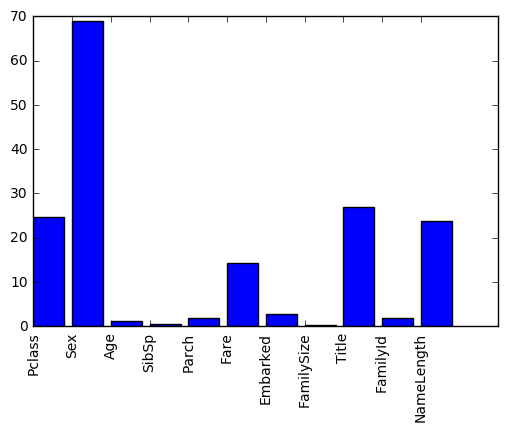

In [25]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_selection import SelectKBest, f_classif

predictors = ["Pclass", "Sex", "Age", "SibSp", "Parch", "Fare", "Embarked", "FamilySize", "Title", "FamilyId", "NameLength"]

# Perform feature selection
selector = SelectKBest(f_classif, k=5)
selector.fit(titanic[predictors], titanic["Survived"])

# Get the raw p-values for each feature, and transform them from p-values into scores
scores = -np.log10(selector.pvalues_)

# Plot the scores  
# Do you see how "Pclass", "Sex", "Title", and "Fare" are the best features?
plt.bar(range(len(predictors)), scores)
plt.xticks(range(len(predictors)), predictors, rotation='vertical')
plt.show()

Gradient Boosting

Another technique that builds on decision trees is gradient boosting. Boosting involves training decision trees one after another, and feeding the errors from one tree into the next tree. This method allows each tree to build on all the ones that came before it. Using this method can lead to overfitting if we build too many trees, though. As we get above 100 trees, it's very easy to overfit and train to quirks in the data set. Because our data set is extremely small, we'll limit the tree count to 25.

Another way to reduce overfitting is to limit the depth to which we can build each tree in the gradient boosting process. We'll limit the tree depth to 3 here to avoid overfitting.

Let's try boosting instead of our random forest approach to see if we can improve our accuracy

Making Predictions With Multiple Classifiers

One thing we can do to improve the accuracy of our predictions is ensemble different classifiers. Ensembling means generating predictions based on information from a set of classifiers, instead of just one. In practice, this means that we average their predictions.

Generally speaking, the more diverse the models we ensemble, the higher our accuracy will be. Diversity means that the models generate their results from different columns, or use very different methods to generate predictions. Ensembling a random forest classifier with a decision tree probably won't work extremely well, because they're very similar. On the other hand, ensembling a linear regression with a random forest can yield very good results.

One caveat with ensembling is that the classifiers we use have to be about the same in terms of accuracy. Ensembling one classifier that's much less accurate than the other will probably make the final result worse.

In this case, we'll ensemble logistic regression we trained on the most linear predictors (the ones that have a linear order, as well as some correlation to Survived) with a gradient-boosted tree we trained on all of the predictors.

We'll keep things simple when we ensemble. We'll average the raw probabilities (from 0 to 1) that we get from our classifiers, and then assume that anything above .5 maps to one, and anything below or equal to .5 maps to 0.

In [26]:
from sklearn.ensemble import GradientBoostingClassifier
import numpy as np

# The algorithms we want to ensemble
# We're using the more linear predictors for the logistic regression, and everything with the gradient boosting classifier
algorithms = [
    [GradientBoostingClassifier(random_state=1, n_estimators=25, max_depth=3), ["Pclass", "Sex", "Age", "Fare", "Embarked", "FamilySize", "Title", "FamilyId"]],
    [LogisticRegression(random_state=1), ["Pclass", "Sex", "Fare", "FamilySize", "Title", "Age", "Embarked"]]
]

# Initialize the cross-validation folds
kf = KFold(titanic.shape[0], n_folds=3, random_state=1)
predictions = []
for train, test in kf:
    train_target = titanic["Survived"].iloc[train]
    full_test_predictions = []
    # Make predictions for each algorithm on each fold
    for alg, predictors in algorithms:
        # Fit the algorithm on the training data
        alg.fit(titanic[predictors].iloc[train,:], train_target)
        # Select and predict on the test fold 
        # We need to use .astype(float) to convert the dataframe to all floats and avoid an sklearn error
        test_predictions = alg.predict_proba(titanic[predictors].iloc[test,:].astype(float))[:,1]
        full_test_predictions.append(test_predictions)
    # Use a simple ensembling scheme&#8212;just average the predictions to get the final classification
    test_predictions = (full_test_predictions[0] + full_test_predictions[1]) / 2
        # Any value over .5 is assumed to be a 1 prediction, and below .5 is a 0 prediction
    test_predictions[test_predictions <= .5] = 0
    test_predictions[test_predictions > .5] = 1
    predictions.append(test_predictions)

# Put all the predictions together into one array
predictions = np.concatenate(predictions, axis=0)

# Compute accuracy by comparing to the training data
accuracy = sum(predictions[predictions == titanic["Survived"]]) / len(predictions)
print(accuracy)

0.819304152637


C:\Users\kknagara\Anaconda2\lib\site-packages\ipykernel\__main__.py:36: FutureWarning: in the future, boolean array-likes will be handled as a boolean array index


In [28]:
# First, we'll add titles to the test set
titles = titanic_test["Name"].apply(get_title)
# We're adding the Dona title to the mapping, because it's in the test set, but not the training set
title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Dr": 5, "Rev": 6, "Major": 7, "Col": 7, "Mlle": 8, "Mme": 8, "Don": 9, "Lady": 10, "Countess": 10, "Jonkheer": 10, "Sir": 9, "Capt": 7, "Ms": 2, "Dona": 10}
for k,v in title_mapping.items():
    titles[titles == k] = v
titanic_test["Title"] = titles
# Check the counts of each unique title
print(pandas.value_counts(titanic_test["Title"]))

# Now we add the family size column
titanic_test["FamilySize"] = titanic_test["SibSp"] + titanic_test["Parch"]

# Now we can add family IDs
# We'll use the same IDs we used earlier
print(family_id_mapping)

family_ids = titanic_test.apply(get_family_id, axis=1)
family_ids[titanic_test["FamilySize"] < 3] = -1
titanic_test["FamilyId"] = family_ids
titanic_test["NameLength"] = titanic_test["Name"].apply(lambda x: len(x))

1     240
2      79
3      72
4      21
7       2
6       2
10      1
5       1
Name: Title, dtype: int64
{"O'Sullivan0": 426, 'Mangan0': 620, 'Lindqvist1': 543, 'Denkoff0': 297, 'Sincock0': 813, 'Rouse0': 413, 'Berglund0': 207, 'Meo0': 142, 'Arnold-Franchi1': 49, 'Chronopoulos1': 71, 'Skoog5': 63, 'Walcroft0': 897, 'Widener2': 329, 'Pengelly0': 217, 'Goncalves0': 400, 'Andersen0': 829, 'Myhrman0': 626, 'Beane1': 456, 'Moss0': 104, 'Carlsson0': 610, 'Nicholls2': 136, 'Jussila1': 110, 'Jussila0': 483, 'Peltomaki0': 725, 'Long0': 632, 'Cassebeer0': 809, 'Portaluppi0': 858, 'Wheadon0': 33, 'Connolly0': 261, 'Hansen2': 680, 'Stephenson1': 493, 'Howard0': 862, 'Smyth0': 805, 'Davies0': 336, 'Silven2': 359, 'Vanden Steen0': 311, 'Sadowitz0': 878, 'Astor1': 571, 'Patchett0': 480, 'Denbury0': 891, 'Johanson0': 184, 'Coleridge0': 220, 'Christmann0': 87, 'Carter3': 340, 'Compton2': 665, 'Carter1': 226, 'Turkula0': 414, 'Lindeberg-Lind0': 793, 'Hassab0': 558, 'Badman0': 755, 'Aronsson0': 914, 'Sa

12: Predicting on the Test Set

We have some better predictions now, so let's create another submission.

In [29]:
predictors = ["Pclass", "Sex", "Age", "Fare", "Embarked", "FamilySize", "Title", "FamilyId"]

algorithms = [
    [GradientBoostingClassifier(random_state=1, n_estimators=25, max_depth=3), predictors],
    [LogisticRegression(random_state=1), ["Pclass", "Sex", "Fare", "FamilySize", "Title", "Age", "Embarked"]]
]

full_predictions = []
for alg, predictors in algorithms:
    # Fit the algorithm using the full training data.
    alg.fit(titanic[predictors], titanic["Survived"])
    # Predict using the test dataset.  We have to convert all the columns to floats to avoid an error
    predictions = alg.predict_proba(titanic_test[predictors].astype(float))[:,1]
    full_predictions.append(predictions)

# The gradient boosting classifier generates better predictions, so we weight it higher
predictions = (full_predictions[0] * 3 + full_predictions[1]) / 4
predictions[predictions <= .5] = 0
predictions[predictions > .5] = 1
predictions = predictions.astype(int)
submission = pandas.DataFrame({
        "PassengerId": titanic_test["PassengerId"],
        "Survived": predictions
    })

Final Thoughts

Now we have a submission! It should earn you a score of .799 on the leaderboard. You can generate a submission file with submission.to_csv("kaggle.csv", index=False).

There's still more work you can do in feature engineering:

    Try using features related to the cabins.
    See if any family size features might help. Do the number of women in a family make the entire family more likely to survive?
    Does the national origin of the passenger's name have anything to do with survival?

There's also a lot more we can do on the algorithm side:

    Try the random forest classifier in the ensemble.
    A support vector machine might work well with this data.
    We could try neural networks.
    Boosting with a different base classifier might work better.

And with ensembling methods:

    Could majority voting be a better ensembling method than averaging probabilities?

This data set is very easy to overfit on; there isn't a lot of data, so you'll be grinding for small accuracy gains. You could also try a different Kaggle competition that has more data and richer features.

